### &#9989; Tamanna Tabassum Khan Munia
#### &#9989; December 3, 2019

# ___Classication of Functional Connectivity Brain Networks___

## Background and Motivation

The human brain is a highly interconnected network. While early studies of neurophysiological and neuroimaging data focused on the analysis of isolated regions, i.e. univariate analysis, most of the recent work indicates that the network organization of the brain fundamentally shapes its function [1]. Complex network theory has contributed significantly to the characterization of the topology of FCNs, in particular in the assessment of functional integration and segregation [1, 2]. Thus, generating comprehensive maps of brain connectivity, and characterizing these networks has become a major goal of neuroscience [3, 4]. 

Complex network theory has been successful at unveiling the topology of the brain and showing alterations to the network structure due to brain disease, cognitive function and behavior. Functional connectivity networks (FCNs) represent  different brain regions as the nodes and the connectivity between them as the edges of a graph. Graph theoretic measures provide a way to extract features from these networks enabling subsequent characterization and discrimination of networks across conditions. Specifically, graph theoretic measures such as the path length and clustering coefficient have helped to characterize small-world brain networks [1], and the degree distribution has been utilized to characterize scale-free networks [5]. Over the last decade, the study of FCNs through complex network theory has provided new means for discriminating between different neural dysfunctions such as epilepsy, depression, Alzheimers Disease and Parkinsons Disease. 

This project aims to extract some meaningful graph theoretic features from a functional connectivity brain network dataset that was collected during a cognitive control related error processing study. After extracting these features, my goal is to use these features to develop some classification models that can discriminate between FCNs constructed across different experimental conditions. 


## Methodology

### Dataset

In this paper, I analyze an EEG dataset that was collected from MSU psychology department. This dataset was used in a previously published cognitive control-related error processing study [6]. The experiment consisted of a speeded-reaction Flanker task in which subjects identified the middle letter on a five-letter string, being congruent (e.g. MMMMM) or incongruent (e.g. MMNMM) with respect to the Flanker letters. EEG responses were recorded by 64 electrode ActiveTwo system (BioSemi, Amsterdam, The Netherlands). The sampling frequency was 512 Hz. 

After removing the artifact and noisy channels, 58 channels were considered for constructing the networks. Data was collected from a total of 18 participants. The objective of data collection is in studying the differences in the FCNs corresponding to error-related negativity (ERN) and the correct-related negativity (CRN) while performing the flanker task. Previous studies have shown that the ERN is associated with increased synchronization in the theta band (4-8 Hz) between electrodes [6], for this reason, the FCN was constructed for each subject by averaging the Phase Locking Value (PLV) over the time window 25-75 ms and the frequency bins corresponding to the theta band per subject and response type. PLV quantifies the phase synchrony between the signals from two electrodes and is defined by the consistency of the phase differences between the selected electrodes. Once the pairwise PLV values are computed between all pairs of electrodes, the weighted adjacency matrix corresponding to the FCN can be constructed as the average of $PLV_{i,j}(t,f)$ within the time interval and frequency band of interest. Thus, the connectivity matrix $\mathbf{W}$ is constructed such that $W_{ij}= \sum_{t\in 25-75 ms} \sum_{f \in \theta band}PLV_{i,j}(t,f)$, i.e. the average connectivity within 25-75 ms time window and theta ($\theta:4-8 Hz$) frequency band. This results in two FCNs of size $58 \times 58$ per subject, one corresponding to error responses and the other to correct responses.

A total of 36 FCNs were constructed from 18 subjects, 18 for correct response and 18 for error response. These FCNs were used as dataset for this project. A more detail explanation of how the FCNs were constructed can be found in [6]. 

### Feature Extraction

Complex networks can be characterized using graph theoretic metrics such as the clustering coefficient, characteristic path length, global efficiency etc [1, 2, 3, 5]. The collected FCN networks are weighted and undirected networks. So through literature review, I have listed some graph theoretic features that can be used to define these weighted networks. The features considered for this project are as follows.

1. Mean connectivity matrix: 
The mean of the adjacency matrix generated for each FCNs were used as the first feature. The value was computed as $mean(W_{ij})$ where $W_{ij}$ is the weighted adjacency matrix.

2. Characteristic Path Length:
The characteristic path length of the network is the average shortest path length between all pairs of nodes in the network. Path length in the brain network represents the potential routes of information flow between two different brain regions and quantifies the potential for functional integration [1]. For a weighted network, the characteristic path length is calculated as [5]:

\begin{eqnarray}
\label{eq:pathlnth}
 L^w= \frac{1}{N}{\sum_{{\substack{i \in V}}}{\frac{{\sum_{{\substack{j \epsilon V , j \neq i}}}} d{_{ij}^w}}{(N-1)}}},
\end{eqnarray}
where $d{_{ij}^w}$ is the shortest weighted path length between node $i$ and $j$ defined as
\begin{eqnarray}
\label{eq:shpathlnth}
d{_{ij}^w}={\sum_{{\substack{a_{uv} \in g_{i\overset w\leftrightarrow j}}}}{f(w_{uv})}},
\end{eqnarray}
\noindent $f$ refers to a map (e.g. an inverse function)  from weight to length and $g_{i\overset w\leftrightarrow j}$ is the shortest weighted path between $i$ and $j$.\\

3. Clustering coefficient: 
The mean clustering coefficient is a measure of segregation and reflects mainly the fraction of clustered connectivity available around individual nodes.  The clustering coefficient for a weighted network is defined as [2]:

\begin{eqnarray}
\label{eq:cluscoeff}
 C^w= \frac{1}{N}{\sum_{{\substack{i \in V}}}{\frac{2{t_{i}^w}}{k_{i}(k_{i}-1)}}},
\end{eqnarray}
where ${t_{i}^w}$ is the weighted geometric mean of the triangles around a node $i$ defined as ${t_{i}^w}=\frac{1}{2}{\sum_{{\substack{j,h \in V}}}{(W_{ij}W_{ih}W_{jh})^{\frac{1}{3}}}}$ and $k_{i}$ is the degree of node $i$.\\

4. Global Efficiency: 
The average inverse shortest path length is defined as the global efficiency of a network. It is a measure of functional integration similar to characteristic path length but can also be computed meaningfully for disconnected networks as an infinite path length results in zero efficiency [2]. The global efficiency for a weighed network is given by [5]:
\begin{eqnarray}
\label{eq:glbleff}
 E^w= \frac{1}{N}{\sum_{{\substack{i \in V}}}{\frac{{\sum_{{\substack{j \in V , j \neq i}}}} {(d{_{ij}^w}})^{-1}}{(N-1)}}},
\end{eqnarray}
where $d{_{ij}^w}$ is the shortest weighted path length between node $i$ and $j$ defined earlier.\\

5. Graph Entropy: 
The Graph Entropy is computed as: 
\begin{equation}\label{eq:ShEntropy}
   H_A = -\sum_{i=0}^{(N-1)} P_{i} \log_{2}(P_{i}),
\end{equation}

All the graphical analysis and feature collection were performed using NetworkX Python package [7]. It can be used for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks [7].
For both ERN and CRN networks, graph theoretic features were extracted for each network constructed for each subject and response type, i.e. a total of 36 networks.  A total of 5 graph theoretic features (Mean connectivity matrix, characteristic path length, clustering coefficient, global efficiency and graph entropy) were extracted for each network corresponding to each subject resulting in a feature matrix of dimension 36×5. A lebel column was added refering correct response as 0 and error response as 1. The computation of these features are given in the following cell.


### Feature Extraction Codes

In [8]:
# import all the required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import permutations
# importing networkx  
import networkx as nx 
from math import log, e
%matplotlib inline

In [9]:
# Define all the required Feature calculating functions

def entropy(labels, base=None):  # this function computes the entropy of the given labels
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    entropy = -(norm_counts * np.log(norm_counts)/np.log(base)).sum()
    return entropy

def global_efficiency(G, weight= None): # this function computes the global_efficiency of the given graph
    N = len(G)
    if N < 2:
        return 0   
    inv_lengths = []
    for node in G:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, node)
        else:
            lengths=nx.single_source_dijkstra_path_length(G,node,weight=weight)

        inv = [1/x for x in lengths.values() if x is not 0]

        
        inv_sum = sum(inv)
        inv_lengths.append(inv_sum)  # add results, one per node

    return sum(inv_lengths)/(N*(N-1))

# these two functions were adapted with the help of stackoverflow

In [10]:
# Load error FCNs and compute the five features described above
filename_error = ['Sub01Error.csv', 'Sub02Error.csv', 'Sub03Error.csv', 'Sub04Error.csv', 'Sub05Error.csv', 'Sub06Error.csv', 'Sub07Error.csv', 'Sub08Error.csv', 'Sub09Error.csv', 'Sub10Error.csv', 'Sub11Error.csv', 'Sub12Error.csv','Sub13Error.csv', 'Sub14Error.csv', 'Sub15Error.csv','Sub16Error.csv', 'Sub17Error.csv', 'Sub18Error.csv']

ftr_1 = []   # compute mean connectivity matrix
ftr_2 = []   # compute characteristic path length of the network
ftr_3 = []   # compute clustering coefficient of the network
ftr_4 = []   # compute global efficiency of the network
ftr_5 = []   # compute entropy of the matrix

for i in filename_error:
    data = np.genfromtxt (i, delimiter=",")
    
    ftr_1.append(np.mean(data))  
    
    A = data
    my_graph = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)  # construct the graph from adjacency matrix
    path_length = nx.average_shortest_path_length(my_graph, weight='weight') # compute average path length
    ftr_2.append(path_length)
    
    clus_coeff = nx.average_clustering(my_graph, weight='weight') # compute clustering coefficient
    ftr_3.append(clus_coeff)
    
    global_eff = global_efficiency(my_graph, weight ='weight')  # compute global efficiency
    ftr_4.append(global_eff)
    
    sh_entropy = entropy(A, base=None)   # compute entropy
    ftr_5.append(sh_entropy)
    
    
label = np.ones(len(ftr_1))    #  label = 1 refering the error response
Error_features = np.column_stack((ftr_1, ftr_2, ftr_3, ftr_4, ftr_5))
Err_ftr_lbl = np.column_stack((ftr_1, ftr_2, ftr_3, ftr_4, ftr_5, label)) # add label to the feature matrix
print("All error features with label: \n", Err_ftr_lbl)


All error features with label: 
 [[0.15437178 0.14896521 0.24312093 6.99704594 7.2618985  1.        ]
 [0.16931121 0.17213131 0.60560311 5.98295946 7.25891282 1.        ]
 [0.20059146 0.20068756 0.32788675 5.15349263 7.27570778 1.        ]
 [0.17366344 0.17363111 0.35037305 5.99320487 7.28147714 1.        ]
 [0.15972902 0.15725762 0.23906526 6.60369119 7.26953438 1.        ]
 [0.16231908 0.16118509 0.29564884 6.44735179 7.27561483 1.        ]
 [0.18287474 0.18071633 0.28647508 5.76453682 7.29426021 1.        ]
 [0.16621502 0.16516908 0.27980274 6.2764065  7.27138479 1.        ]
 [0.17215581 0.17066689 0.25564426 6.08031403 7.27416846 1.        ]
 [0.1734651  0.17164888 0.23050627 6.06307576 7.27642291 1.        ]
 [0.20807923 0.20738347 0.30254865 4.9994996  7.28817976 1.        ]
 [0.12612643 0.12280961 0.2466102  8.44626885 7.24118459 1.        ]
 [0.12994705 0.12431897 0.22123089 8.3616124  7.24850938 1.        ]
 [0.12701471 0.12232764 0.20102728 8.46566606 7.24973761 1.        ]
 

In [11]:
# Load correct FCNs and compute the five features described above

filename_correct =  ['Sub01Correct.csv', 'Sub02Correct.csv', 'Sub03Correct.csv', 'Sub04Correct.csv', 'Sub05Correct.csv', 'Sub06Correct.csv', 'Sub07Correct.csv', 'Sub08Correct.csv', 'Sub09Correct.csv', 'Sub10Correct.csv', 'Sub11Correct.csv', 'Sub12Correct.csv','Sub13Correct.csv', 'Sub14Correct.csv', 'Sub15Correct.csv','Sub16Correct.csv', 'Sub17Correct.csv', 'Sub18Correct.csv']

ftr_1 = []   # compute mean connectivity matrix
ftr_2 = []   # compute characteristic path length of the network
ftr_3 = []   # compute clustering coefficient of the network
ftr_4 = []   # compute global efficiency of the network
ftr_5 = []   # compute entropy of the matrix

for i in filename_correct:
    data = np.genfromtxt (i, delimiter=",")
    ftr_1.append(np.mean(data))
    
    A = data
    my_graph = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
    path_length = nx.average_shortest_path_length(my_graph, weight='weight')
    ftr_2.append(path_length)
    
    clus_coeff = nx.average_clustering(my_graph, weight='weight')
    ftr_3.append(clus_coeff)
    
    global_eff = global_efficiency(my_graph, weight ='weight')
    ftr_4.append(global_eff)
    
    
    sh_entropy = entropy(A, base=None)
    ftr_5.append(sh_entropy)
    
label = np.zeros(len(ftr_1))  #  label = 0 refering the correct response
Correct_features = np.column_stack((ftr_1, ftr_2, ftr_3, ftr_4, ftr_5))
Crr_ftr_lbl = np.column_stack((ftr_1, ftr_2, ftr_3, ftr_4, ftr_5, label)) # add label to the feature matrix
print("All correct features with label: \n", Crr_ftr_lbl)


All correct features with label: 
 [[0.13610014 0.13844194 0.58018448 7.42442604 7.23325373 0.        ]
 [0.16636674 0.16539289 0.28105253 6.26597206 7.26252068 0.        ]
 [0.19073369 0.19394577 0.5686567  5.29729592 7.28127512 0.        ]
 [0.15282788 0.14747535 0.24312101 7.06773498 7.25839971 0.        ]
 [0.14758258 0.14977989 0.58466079 6.92124288 7.27911363 0.        ]
 [0.15426803 0.15673936 0.552806   6.58780816 7.26191462 0.        ]
 [0.17079547 0.17347368 0.55957278 5.96019187 7.26283177 0.        ]
 [0.15612703 0.15860589 0.58681599 6.50386184 7.26570839 0.        ]
 [0.16115507 0.16383821 0.60546226 6.28601008 7.25252128 0.        ]
 [0.161052   0.16366694 0.61707809 6.30789614 7.267886   0.        ]
 [0.19532367 0.19866361 0.61670748 5.17909872 7.2902483  0.        ]
 [0.11549544 0.11746761 0.615456   8.74752486 7.23305171 0.        ]
 [0.11339275 0.11521252 0.54123574 8.90455978 7.22764524 0.        ]
 [0.1131419  0.11512344 0.61824422 8.88042291 7.21697187 0.        ]

### Classification of FCNs

In this section, we evaluate the classification power of the features extracted from using the graph theoretic measures. For a comprehensive comparison, we employed a set of classifiers including support vector machines (SVM), Multi-layer Perceptron (MLP), k-nearest neighbor (kNN) and Gaussian Naive Bayes classifier (GNB). The implementation of these classification models was done using Python scikit-learn package [8]. The whole data set was divided randomly into test and trainning dataset. 10 subjects with 20 samples (error and correct response) was selected for the trainning data and rest 8 subjects with 16 samples were chosen for the test data.


In [24]:
# Generating trainning and test data randomly, here I added a seed to keep the output consistent

def randomly_select_test_train(ftr_matrix, idx_size):
    np.random.seed(seed=1)
    idx = np.random.choice(len(ftr_matrix), size=idx_size, replace=False)
    train = ftr_matrix[idx,:]
    all_index = np.arange(len(ftr_1))
    non_idx = np.array(list(set(all_index).difference(idx)))
    test = ftr_matrix[non_idx,:]
    return [train, test]


In [25]:
# randomly selecting the train and test data
[train_error, test_error ] = randomly_select_test_train(Err_ftr_lbl, 10)
[train_correct, test_correct ] = randomly_select_test_train(Crr_ftr_lbl, 10)

In [26]:
# shuffle the train and test matrix to mix error and correct responses

from sklearn.utils import shuffle

train_matrix = np.concatenate((train_error,train_correct), axis=0)
train_matrix = shuffle(train_matrix)
test_matrix = np.concatenate((test_error,test_correct), axis=0)
test_matrix = shuffle(test_matrix)
print(test_matrix ) # print the test matrix for verification

[[0.12612643 0.12280961 0.2466102  8.44626885 7.24118459 1.        ]
 [0.12994705 0.12431897 0.22123089 8.3616124  7.24850938 1.        ]
 [0.14304831 0.14546522 0.57685604 7.07007106 7.24748317 0.        ]
 [0.14473926 0.13967163 0.22674589 7.45384797 7.2697364  1.        ]
 [0.11339275 0.11521252 0.54123574 8.90455978 7.22764524 0.        ]
 [0.161052   0.16366694 0.61707809 6.30789614 7.267886   0.        ]
 [0.17215581 0.17066689 0.25564426 6.08031403 7.27416846 1.        ]
 [0.15713235 0.15431562 0.25680547 6.74040835 7.26448015 1.        ]
 [0.1734651  0.17164888 0.23050627 6.06307576 7.27642291 1.        ]
 [0.16115507 0.16383821 0.60546226 6.28601008 7.25252128 0.        ]
 [0.13610014 0.13844194 0.58018448 7.42442604 7.23325373 0.        ]
 [0.13103676 0.13316872 0.540159   7.74852863 7.23521321 0.        ]
 [0.11549544 0.11746761 0.615456   8.74752486 7.23305171 0.        ]
 [0.15437178 0.14896521 0.24312093 6.99704594 7.2618985  1.        ]
 [0.16231908 0.16118509 0.29564884

In [27]:
# view train and test features and labels

trn_data_x = train_matrix[:, 0:5]
trn_data_y = np.ravel(train_matrix[:, 5:6])

tst_data_x = test_matrix[:, 0:5]
tst_data_y = np.ravel(test_matrix[:, 5:6])

print("Training data\n")
print(trn_data_x)
print("\nTraining data labels\n")
print(trn_data_y)

print("\nTest data\n")
print(tst_data_x)
print("\nTest data labels\n")
print(tst_data_y)

Training data

[[0.18610671 0.1892385  0.59206871 5.42492639 7.26808802]
 [0.19532367 0.19866361 0.61670748 5.17909872 7.2902483 ]
 [0.20059146 0.20068756 0.32788675 5.15349263 7.27570778]
 [0.15612703 0.15860589 0.58681599 6.50386184 7.26570839]
 [0.16931121 0.17213131 0.60560311 5.98295946 7.25891282]
 [0.18287474 0.18071633 0.28647508 5.76453682 7.29426021]
 [0.13245055 0.12347551 0.18984721 8.43869875 7.25973701]
 [0.13028005 0.12477939 0.222629   8.32832978 7.24314406]
 [0.17366344 0.17363111 0.35037305 5.99320487 7.28147714]
 [0.20807923 0.20738347 0.30254865 4.9994996  7.28817976]
 [0.14758258 0.14977989 0.58466079 6.92124288 7.27911363]
 [0.15972902 0.15725762 0.23906526 6.60369119 7.26953438]
 [0.19718231 0.19622466 0.29874932 5.2804744  7.2929229 ]
 [0.12701471 0.12232764 0.20102728 8.46566606 7.24973761]
 [0.19073369 0.19394577 0.5686567  5.29729592 7.28127512]
 [0.1131419  0.11512344 0.61824422 8.88042291 7.21697187]
 [0.17079547 0.17347368 0.55957278 5.96019187 7.26283177]

## Results

All the analysis was performed on the FCNs created from EEG data during error and correct response. Following figure shows an example of FCN generated from both response types for subject 10.


Text(0.5, 1.0, 'FCN during Correct response')

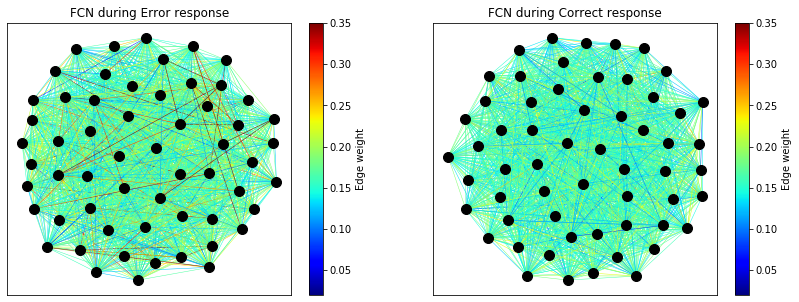

In [29]:
# plot the graph networks for subject 10
er_example = np.genfromtxt ('Sub10Error.csv', delimiter=",")
er_graph = nx.from_numpy_matrix(np.matrix(er_example), create_using=nx.Graph)

cr_example = np.genfromtxt ('Sub10Correct.csv', delimiter=",")
cr_graph = nx.from_numpy_matrix(np.matrix(cr_example), create_using=nx.Graph)

plt.figure(figsize=(14, 5))
plt.subplot(121)
edges,weights = zip(*nx.get_edge_attributes(er_graph,'weight').items())

pos = nx.spring_layout(er_graph)

nodes = nx.draw_networkx_nodes(er_graph,pos,node_size=100, node_color='k', with_labels=False)
edges = nx.draw_networkx_edges(er_graph,pos,edgelist=edges, edge_color=weights, width=0.5, edge_cmap=plt.cm.jet, edge_vmin =0.02,edge_vmax=0.35)
c=plt.colorbar(edges)
c.set_label('Edge weight')
plt.title("FCN during Error response")

plt.subplot(122)
edges,weights = zip(*nx.get_edge_attributes(cr_graph,'weight').items())

pos = nx.spring_layout(cr_graph)

nodes = nx.draw_networkx_nodes(cr_graph,pos,node_size=100, node_color='k', with_labels=False)
edges = nx.draw_networkx_edges(cr_graph,pos,edgelist=edges, edge_color=weights, width=0.5, edge_cmap=plt.cm.jet, edge_vmin =0.02,edge_vmax=0.35)
c=plt.colorbar(edges)
c.set_label('Edge weight')
plt.title("FCN during Correct response")
#plt.savefig("Edge_representation.png", dpi=100)

5 Features were extracted for each subject for both response following the Feature Selection section. In order to determine which measure, as a continuous test statistics, best discriminates between error and correct networks, the feature values for each response in the trainning data is plotted as follows:

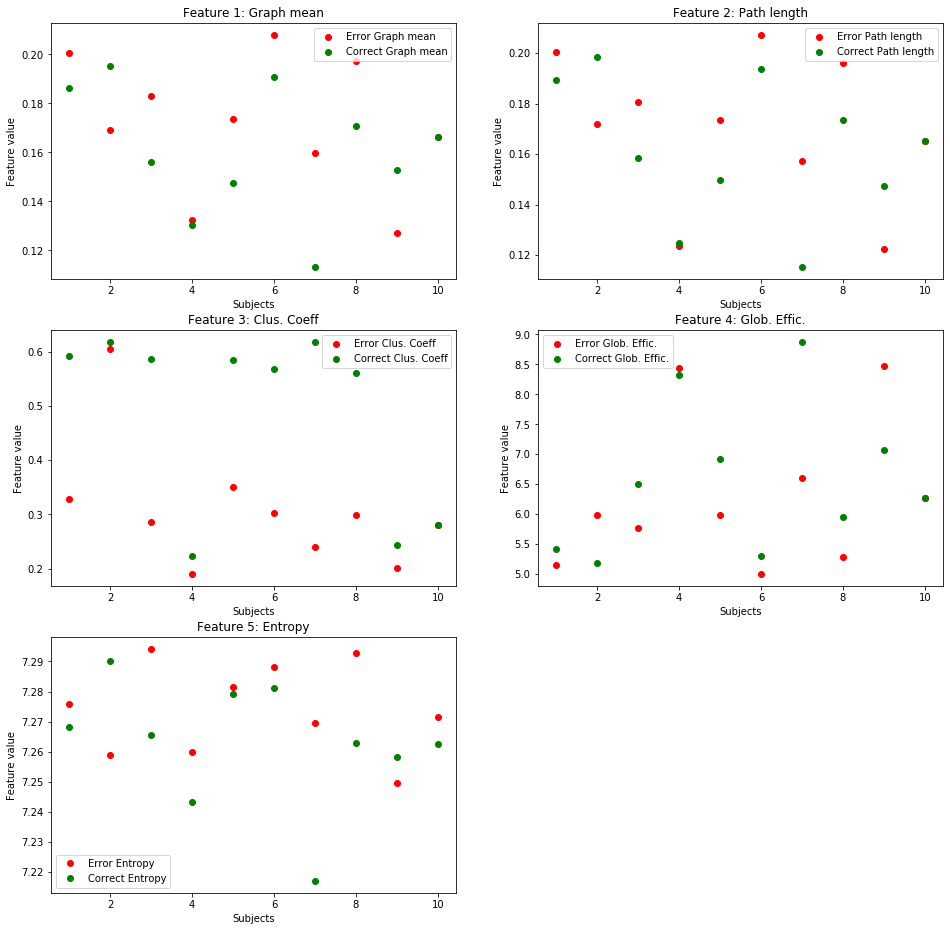

In [30]:
# Feature representation of the traiining data
error_data = train_matrix[trn_data_y==1]
correct_data = train_matrix[trn_data_y==0]
subject =  np.arange(1,11)
plt.figure(figsize=(16,16))
plt.subplot(321)
plt.plot( subject, error_data[:, 0:1] , 'ro', label = 'Error Graph mean')
plt.plot(subject, correct_data[:, 0:1], 'go', label = 'Correct Graph mean')
plt.legend()
plt.xlabel('Subjects')
plt.ylabel('Feature value')
plt.title("Feature 1: Graph mean")

plt.subplot(322)
plt.plot( subject, error_data[:, 1:2] , 'ro', label = 'Error Path length')
plt.plot(subject, correct_data[:, 1:2], 'go', label = 'Correct Path length')
plt.legend()
plt.xlabel('Subjects')
plt.ylabel('Feature value')
plt.title("Feature 2: Path length")

plt.subplot(323)
plt.plot( subject, error_data[:, 2:3] , 'ro', label = 'Error Clus. Coeff')
plt.plot(subject, correct_data[:, 2:3], 'go', label = 'Correct Clus. Coeff')
plt.legend()
plt.xlabel('Subjects')
plt.ylabel('Feature value')
plt.title("Feature 3: Clus. Coeff")


plt.subplot(324)
plt.plot( subject, error_data[:, 3:4] , 'ro', label = 'Error Glob. Effic.')
plt.plot(subject, correct_data[:, 3:4], 'go', label = 'Correct Glob. Effic.')
plt.legend()
plt.xlabel('Subjects')
plt.ylabel('Feature value')
plt.title("Feature 4: Glob. Effic.")

plt.subplot(325)
plt.plot( subject, error_data[:, 4:5] , 'ro', label = 'Error Entropy')
plt.plot(subject, correct_data[:, 4:5], 'go', label = 'Correct Entropy')
plt.legend()
plt.xlabel('Subjects')
plt.ylabel('Feature value')
plt.title("Feature 5: Entropy")

plt.savefig("Feature_representation.png", dpi=100)

From the feature representation, we can see clustering coefficient is the most discriminating features between the two response.

## Classification Models


Multilinear Perceptron algorithm is a simple linear algorithm that attempts to find a hyperplane that separates the data into two halves. It is a very fast algorithm and does not require a large dataset for training. In this model, ReLU activation function and Adam optimizer are used. L2 regularization is used, with alpha set to 0.0001. A fully connected layer set is used as the hidden part of the model. 

For SVM, The penalty parameter C is set to 1. The RBF kernel is used with a auto gamma. No limit is set on the number of
iterations and the tolerance is set to 0.001. 

For kNN, both K=3 and K=5 was explored and was set as K = 5. Uniform weights are used among all the data points and euclidean distance is selected as the distance metric. Finally GNB was applied which is the only Naive Bayes classifier that applies on negative and continuous data. The trainning and test model generation and classification models are given below.

### MLPClassifier

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,   # create the model
                    hidden_layer_sizes=(6,2), random_state=1)

clf_nn.fit(trn_data_x, trn_data_y)
predicted_labels_nn = clf_nn.predict(tst_data_x)  # predict using the model

# print prediction results

print("Predicted Labels")
print(predicted_labels_nn, "\n")
print("True Labels")
print(tst_data_y, "\n")

score_nn = clf_nn.score(tst_data_x, tst_data_y)

print("Accuracy = ", score_nn, "\n")

print("Classification Report\n")
print(classification_report(tst_data_y, predicted_labels_nn), "\n")

print("Confusion Matrix\n")
print(confusion_matrix(tst_data_y, predicted_labels_nn))

Predicted Labels
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.] 

True Labels
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.] 

Accuracy =  0.5625 

Classification Report

              precision    recall  f1-score   support

         0.0       0.55      0.75      0.63         8
         1.0       0.60      0.38      0.46         8

    accuracy                           0.56        16
   macro avg       0.57      0.56      0.55        16
weighted avg       0.57      0.56      0.55        16
 

Confusion Matrix

[[6 2]
 [5 3]]


### SVMClassifier

In [32]:
from sklearn.svm import SVC

clf_svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
              max_iter=-1, probability=False, random_state=None, shrinking=True,
              tol=0.001, verbose=False)

clf_svm.fit(trn_data_x, trn_data_y)
predicted_labels_svm = clf_svm.predict(tst_data_x)

print("Predicted Labels")
print(predicted_labels_svm, "\n")
print("True Labels")
print(tst_data_y, "\n")

score_svm = clf_svm.score(tst_data_x, tst_data_y)

print("Accuracy = ", score_svm)

print("Classification Report\n")
print(classification_report(tst_data_y, predicted_labels_svm), "\n")

print("Confusion Matrix\n")
print(confusion_matrix(tst_data_y, predicted_labels_svm))

Predicted Labels
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 

True Labels
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.] 

Accuracy =  0.625
Classification Report

              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73         8
         1.0       1.00      0.25      0.40         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16
 

Confusion Matrix

[[8 0]
 [6 2]]


### kNNClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors= 5, weights='uniform', algorithm='auto',
                               leaf_size=30, p=2, metric='minkowski', metric_params=None,
                               n_jobs=None)

clf_knn.fit(trn_data_x, trn_data_y)
predicted_labels_knn = clf_knn.predict(tst_data_x)

print("Predicted Labels")
print(predicted_labels_nn, "\n")
print("True Labels")
print(tst_data_y, "\n")

score_knn = clf_knn.score(tst_data_x, tst_data_y)

print("Accuracy = ", score_knn)

print("Classification Report\n")
print(classification_report(tst_data_y, predicted_labels_knn), "\n")

print("Confusion Matrix\n")
print(confusion_matrix(tst_data_y, predicted_labels_knn))

Predicted Labels
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.] 

True Labels
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.] 

Accuracy =  0.6875
Classification Report

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76         8
         1.0       1.00      0.38      0.55         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16
 

Confusion Matrix

[[8 0]
 [5 3]]


### GNBClassifier

In [34]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(trn_data_x, trn_data_y)
predicted_labels_gnb = clf_gnb.predict(tst_data_x)


print("Predicted Labels")
print(predicted_labels_gnb, "\n")
print("True Labels")
print(tst_data_y, "\n")

score_gnb = clf_gnb.score(tst_data_x, tst_data_y)

print("Accuracy = ", score_gnb)

print("Classification Report\n")
print(classification_report(tst_data_y, predicted_labels_gnb), "\n")

print("Confusion Matrix\n")
print(confusion_matrix(tst_data_y, predicted_labels_gnb))

Predicted Labels
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.] 

True Labels
[1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.] 

Accuracy =  0.875
Classification Report

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         8
         1.0       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16
 

Confusion Matrix

[[8 0]
 [2 6]]


### Classification Results

Table 1 lists the classification performance for the proposed graph theoretic features in terms of accuracy for different classifiers.

| Model | Accuracy | 
| --- | --- | 
| MLP | 56.25% | 
| SVM | 62.50% | 
| kNN | 68.75% | 
| GNB | 87.50% | 

From the classifiers, we can see the highest accuracy is observed by GNB. The GNB is the simplest tree based classifier. When classifying an unknown sample, the Naive Bayes computes the probabilities of the sample pertaining to each class and select the class label with the largest probability. Also it can work with smaller datasets. AS the dataset used here is very small (only 18 subject), it's not surprising that our simple GNB model executed the best result on the testing set. All the other classifiers like MLP, kNN and SVM requires high number of data for trainning and it is expected that these model performs poorly in our small dataset.

## Discussion and Conclusion

In this project, a set of graph theoretic features were extracted for weighted FCNs and were used to characterize the networks using classification models. Results acquired from this study indicate that the features extracted from FCNs are  discriminative enough for classifying between error and correct responses with a highest 87.5% accuracy with GNB classifier. Therefore, accumulated evidence from this study suggests that the proposed graph theoretic features approach can be used to successfully characterize the dynamics of the functional connectivity networks. 

### References

1. Rubinov M, Sporns O. Complex network measures of brain connectivity: uses and interpretations. Neuroimage. 2010;52(3):1059{1069.
2. Bullmore E, Sporns O. Complex brain networks: graph theoretical analysis of structural and functional systems. Nature Reviews Neuroscience.2009;10(3):186{198.
3. Fallani FDV, Richiardi J, Chavez M, Achard S. Graph analysis of functional brain networks: practical issues in translational neuroscience. Phil Trans R Soc B. 2014;369(1653):20130521.
4. Van Essen DC, Ugurbil K, Auerbach E, Barch D, Behrens T, Bucholz R, et al. The Human Connectome Project: a data acquisition perspective. Neuroimage.2012;62(4):2222{2231.
5. Rubinov M, Sporns O. Weight-conserving characterization of complex functional brain networks. Neuroimage. 2011;56(4):2068{2079}.
6. Moran TP, Bernat EM, Aviyente S, Schroder HS, Moser JS. Sending mixed signals: Worry is associated with enhanced initial error processing but reduced call for subsequent cognitive control. Social cognitive and affective neuroscience. 2015; p. nsv046.
7. Software for complex networks (https://networkx.github.io/).
8. Python scikit-learn package (https://scikit-learn.org/stable/index.html)